In [1]:
import pickle
import math
from collections import defaultdict 
import matplotlib.pyplot as plt

In [2]:
predicted_bbs = {}

with open('../output/predictions.pickle', 'rb') as handle:
    predicted_bbs = pickle.load(handle)

In [3]:
threshold = 0.81
max_dist = 600

def distance(p1, p2):
    x1,y1 = p1
    x2,y2 = p2
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

for seq_name in predicted_bbs.keys():
    found_points_pred = {}
    
    for image, predictions in predicted_bbs['00_day-fog'].items():
        for pred in predictions:
            x,y,x2,y2,pred = pred 
            if pred > threshold:
                center = int(x + (x2-x)/2), int(y + (y2-y)/2)
                
                already_seen = False
                for seen in found_points_pred.values():
                    #print(seen)
                    d = distance(seen[-1], center)
                    
                    if d > max_dist:
                        continue
                    already_seen = True
                    found_points_pred[seen[0]].append(center)
                    break
                
                if not already_seen:
                    found_points_pred[center] = [center]
    break

In [4]:
max_dist = 600

with open('../output/gt_bbs.pickle', 'rb') as handle:
    gt_bbs = pickle.load(handle)

for seq_name in gt_bbs.keys():
    found_points_gt = {}
    
    for image, gts in gt_bbs['00_day-orig'].items():
        for gt in gts:
            x,y,x2,y2,pred = gt
            
            center = int(x + (x2-x)/2), int(y + (y2-y)/2)

            already_seen = False
            for seen in found_points_gt.values():
                #print(seen)
                d = distance(seen[-1], center)

                if d > max_dist:
                    continue
                already_seen = True
                found_points_gt[seen[0]].append(center)
                break

            if not already_seen:
                found_points_gt[center] = [center]
    break

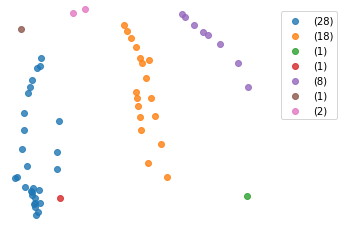

59

In [20]:
fig, ax = plt.subplots()
ax.set_ylim(2500, 0)  # decreasing time
ax.set_xlim(0, 4500)  # decreasing time
t = 0
ts = 0

plt.axis('off')

for k,v in found_points_pred.items():  
    xs = [x[0] for x in v]
    ys = [y[1] for y in v]
    plt.scatter(xs,ys,label=f'({len(xs)})',alpha=0.8)
    plt.legend()
    t+=1
    ts+=len(xs)
plt.savefig("../visuals/predicted_path.png", dpi=300)
plt.show()
ts

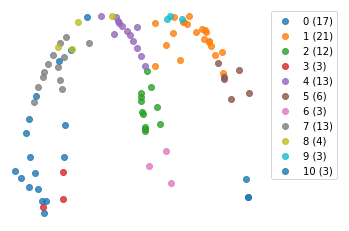

98

In [18]:
fig, ax = plt.subplots()
ax.set_ylim(2500, -100)  # decreasing time
ax.set_xlim(-100, 4500)  # decreasing time
t = 0
ts = 0

plt.axis('off')

for k,v in found_points_gt.items():
    xs = [x[0] for x in v]
    ys = [y[1] for y in v]
    plt.scatter(xs,ys,label=f'{t} ({len(xs)})',alpha=0.8)
    plt.legend()
    t+=1
    ts+=len(xs)
plt.savefig("../visuals/gt_path.png", dpi=300)
plt.show()
ts